In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/listings.csv')

In [2]:
print("First rows:")
print(df.head())

print("\nDataset size:")
print(df.shape)

print("\nDataset columns:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False))

print("\nGeneral statistics:")
print(df.describe(include='all'))

print("\nPreview of key columns:")
print(df[[
    "price",
    "neighbourhood",
    "room_type",
    "availability_365",
    "number_of_reviews",
    "minimum_nights"
]].head())

First rows:
      id                                              name   host_id  \
0  11508                Amazing Luxurious Apt-Palermo Soho     42762   
1  14222      RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES  87710233   
2  15074                             ROOM WITH RIVER SIGHT     59338   
3  16695                         DUPLEX LOFT 2 - SAN TELMO     64880   
4  20062  PENTHOUSE /Terrace & pool /City views /2bedrooms     75891   

       host_name  neighbourhood_group neighbourhood   latitude  longitude  \
0        Candela                  NaN       Palermo -34.581840 -58.424150   
1          María                  NaN       Palermo -34.586170 -58.410360   
2         Monica                  NaN         Nuñez -34.538920 -58.465990   
3  Elbio Mariano                  NaN     Monserrat -34.614390 -58.376110   
4         Sergio                  NaN       Palermo -34.581848 -58.441605   

         room_type     price  minimum_nights  number_of_reviews last_review  \
0  Entire hom

In [3]:
df_clean = df.copy()

print("Sample values in 'price':")
print(df_clean["price"].dropna().unique()[:5])

df_clean["price"] = (
    df_clean["price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

print("\nAfter cleaning:")
print(df_clean["price"].dtype)
print(df_clean["price"].head())

df_clean = df_clean[df_clean["price"] <= 1000]

print("\nPrice statistics after cleaning:")
print(df_clean["price"].describe())

Sample values in 'price':
[ 67518.  22375.  52511. 113360.  30761.]

After cleaning:
float64
0     67518.0
1     22375.0
2         NaN
3     52511.0
4    113360.0
Name: price, dtype: float64

Price statistics after cleaning:
count      3.000000
mean     503.333333
std      212.210587
min      260.000000
25%      430.000000
50%      600.000000
75%      625.000000
max      650.000000
Name: price, dtype: float64


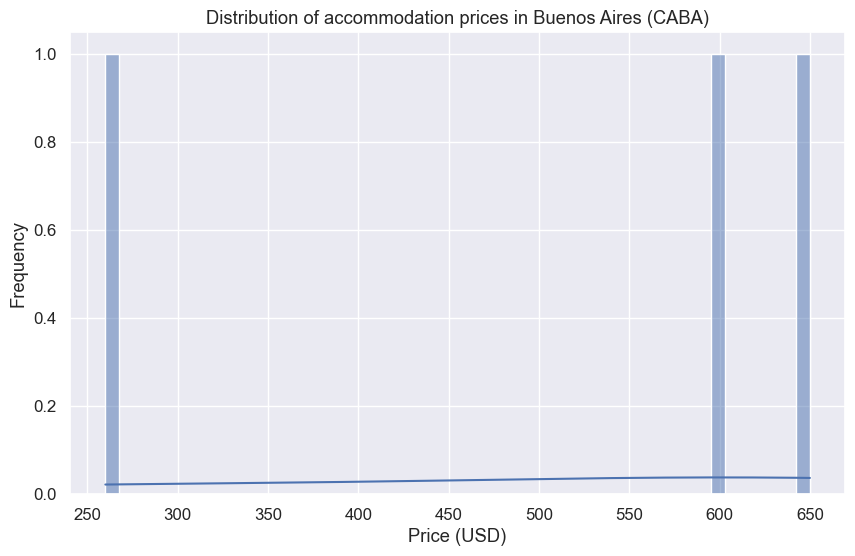

In [4]:
plt.style.use("ggplot")
sns.set(font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)

sns.histplot(df_clean["price"], bins=50, kde=True)
plt.title("Distribution of accommodation prices in Buenos Aires (CABA)")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

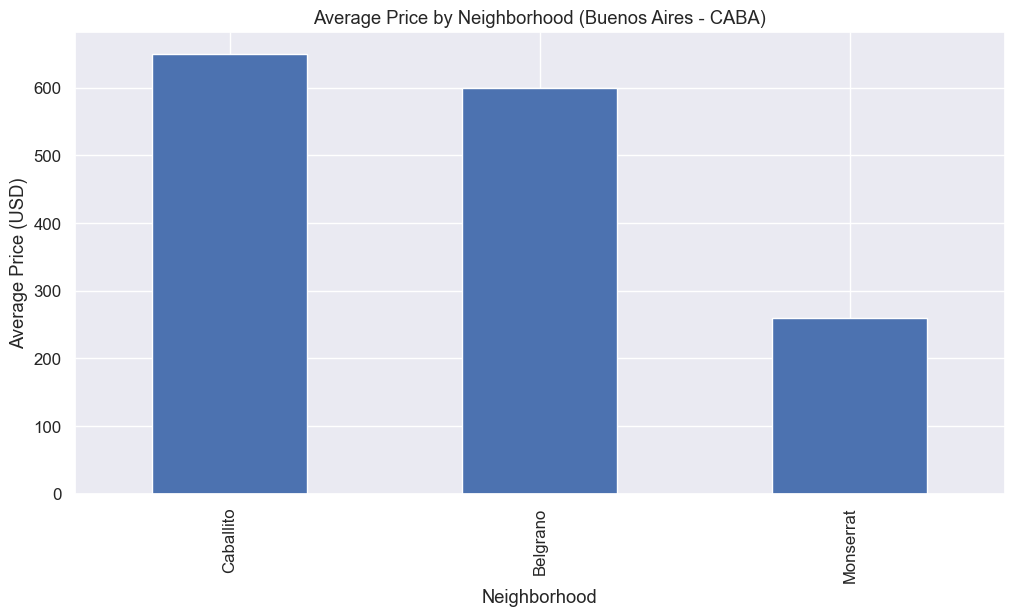

In [5]:
avg_price_neigh = df_clean.groupby("neighbourhood")["price"].mean().sort_values(ascending=False)
avg_price_neigh.plot(kind="bar", figsize=(12, 6))
plt.title("Average Price by Neighborhood (Buenos Aires - CABA)")
plt.ylabel("Average Price (USD)")
plt.xlabel("Neighborhood")
plt.xticks(rotation=90)
plt.show()

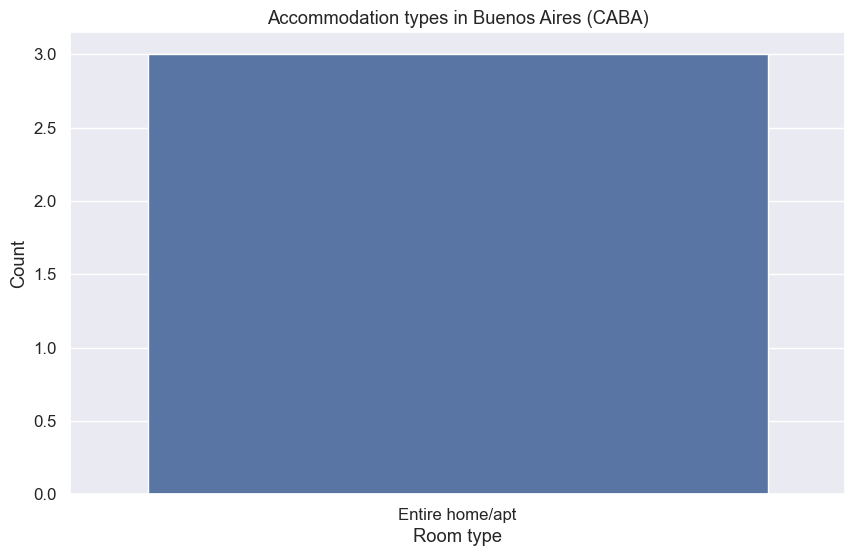

In [6]:
sns.countplot(data=df_clean, x="room_type", order=df_clean["room_type"].value_counts().index)
plt.title("Accommodation types in Buenos Aires (CABA)")
plt.xlabel("Room type")
plt.ylabel("Count")
plt.show()

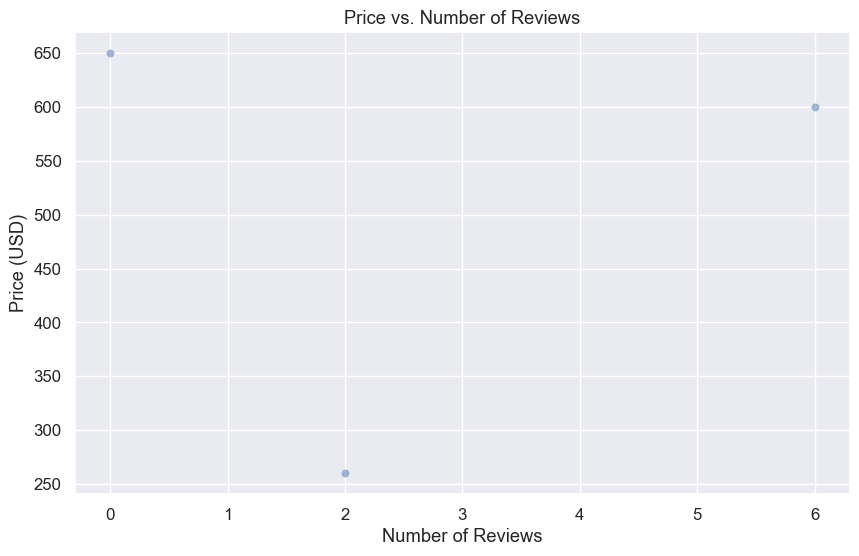

In [7]:
sns.scatterplot(data=df_clean, x="number_of_reviews", y="price", alpha=0.5)
plt.title("Price vs. Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price (USD)")
plt.show()

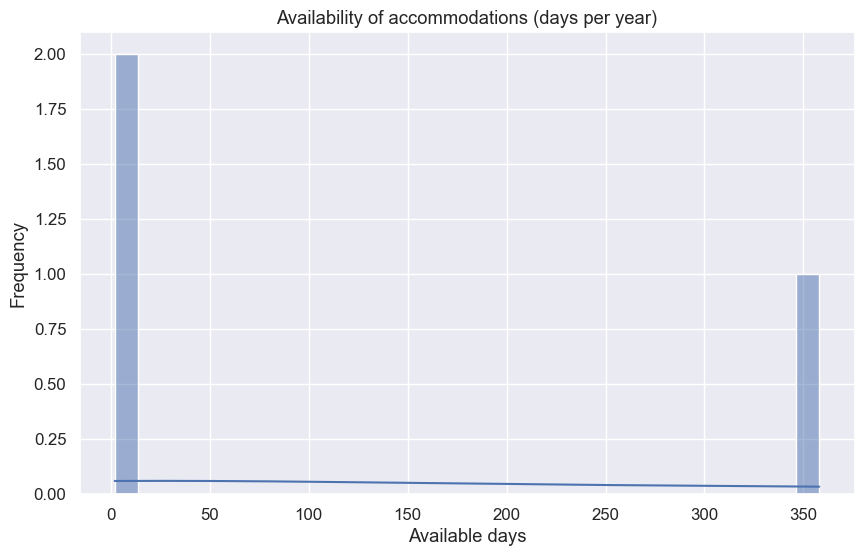

In [8]:
sns.histplot(df_clean["availability_365"], bins=30, kde=True)
plt.title("Availability of accommodations (days per year)")
plt.xlabel("Available days")
plt.ylabel("Frequency")
plt.show()

In [9]:
df_clean = df[
    (df['price'] > 0) & (df['price'] < 100000) &
    (df['minimum_nights'] <= 60)
].copy()

df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')

df_clean = df_clean.dropna(subset=['price', 'neighbourhood', 'room_type'])

In [10]:
print(df_clean.columns)

print(df_clean.head())

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')
      id                                               name   host_id  \
0  11508                 Amazing Luxurious Apt-Palermo Soho     42762   
1  14222       RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES  87710233   
3  16695                          DUPLEX LOFT 2 - SAN TELMO     64880   
6  24713  BEAUTIFUL, EXCELLENT UBICATION/OBELISK  5 STAR...    100743   
8  27631   Departamento en Vicente López y Callao, Recoleta    119446   

       host_name  neighbourhood_group neighbourhood  latitude  longitude  \
0        Candela                  NaN       Palermo -34.58184  -58.42415   
1          María                  NaN       Palermo -34.58617